# Importowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")

In [2]:
%matplotlib inline

# Regresja liniowa  dla niewielkiej liczby punktów

In [3]:
X01 = np.array([1,2])
X01 = np.expand_dims(X01, axis=1)
y01 = [3.14, 6.28]
model01 = LinearRegression().fit(X01, y01)

In [4]:
model01.coef_

array([3.14])

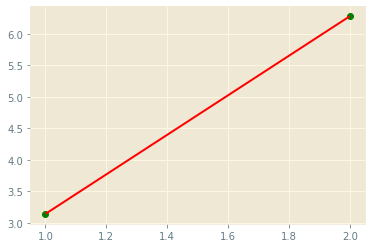

In [5]:
pred01 = model01.predict(X01)
plt.scatter(X01, y01, c='g')
plt.plot(X01, pred01, c='r')

# Wykorzystanie przykładowego zbioru danych

In [6]:
irisdf = sns.load_dataset("iris")

In [7]:
irisdf

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# One-Hot encoding dannych jakościowych
Funkcja *pd.get_dummies(df)* zwraca oryginalną funkcję z tekstowymi zmiennymi zamienionymi na kilka kolumn z wartościami 0/1.

In [9]:
irisdf_dum = pd.get_dummies(irisdf)

In [10]:
irisdf_dum.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width  species_setosa  \
0             5.1          3.5           1.4          0.2               1   
1             4.9          3.0           1.4          0.2               1   
2             4.7          3.2           1.3          0.2               1   
3             4.6          3.1           1.5          0.2               1   
4             5.0          3.6           1.4          0.2               1   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3               0   
146           6.3          2.5           5.0          1.9               0   
147           6.5          3.0           5.2          2.0               0   
148           6.2          3.4           5.4          2.3               0   
149           5.9          3.0           5.1          1.8               0   

     species_versicolor  species_virginica  


# Kodowanie jakościowej zmiennej przewidywanej

In [11]:
from sklearn.preprocessing import LabelEncoder
iris_enc = irisdf.copy()
iris_enc["species"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [12]:
encoder = LabelEncoder()
iris_enc["species"] = encoder.fit_transform(iris_enc["species"])
iris_enc.species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [13]:
encoder.inverse_transform(iris_enc.species)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [14]:
iris_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Testowanie modelu
Do określenia użyteczności modelu należy wykorzystać metryki.
Metryki są w poniższych pakietach:
 - sklearn.metrics
 - sklearn.model_selection

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [28]:
X = iris_enc.iloc[:, 0:4]
y = iris_enc.iloc[:, 4]
logreg = LogisticRegression(max_iter = 2000)
logreg.fit(X, y)
cvs = cross_val_score(logreg, X, y, cv=10)
cvs.mean()

0.9733333333333334

# Optymalizowanie modelu

In [29]:

from sklearn.model_selection import GridSearchCV

lr =  LogisticRegression()
param_grid = {
    "max_iter" : [2000],
    "penalty" : ["l1", "l2"],
    "C" : np.logspace(-4, 4, 20),
    "solver" : ["liblinear"]
}
clf_lr = GridSearchCV(lr, param_grid=param_grid, cv=5, verbose=True, n_jobs=1)
lr_bestie = clf_lr.fit(X,y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [30]:
lr = lr_bestie.best_estimator_

In [31]:
cross_val_score(lr, X, y, cv=5).mean()

0.9800000000000001